# Starting with Qsikit

Starting to learn qsikit functions with the goal to implement BB84 Protocol

## Qsikit basic

In [2]:
import numpy as np
from qiskit.visualization import array_to_latex
ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])

M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2


display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Defining and displaying state vectors

In [3]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([ 1/sqrt(2), 1/sqrt(2) ])
v = Statevector([ (1 + 2.0j) / 3, -2/3 ])
w = Statevector( [ 1 / 3, 2 / 3 ] )

display(u.draw("latex"))
display(v.draw("latex"))
display(w.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Simulating measurements using Statevector

In [4]:
display(v.draw("latex"))

outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-Measurement state: ")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 1
Post-Measurement state: 


<IPython.core.display.Latex object>

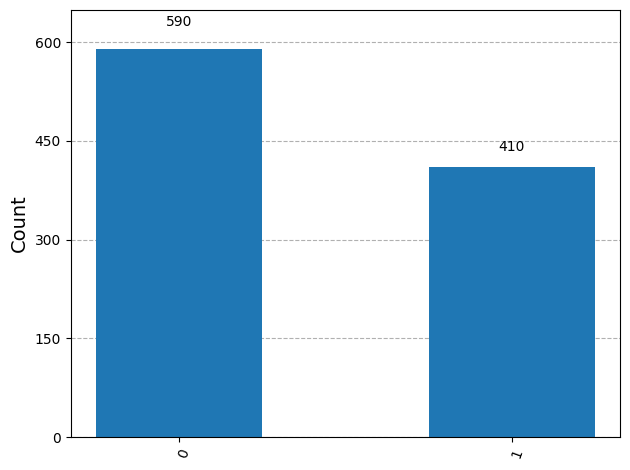

In [5]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

## Performing operations with Operator and Statevector

In [6]:
from qiskit.quantum_info import Operator

Y = Operator([ [ 0, -1.0j ], [ 1.0j, 0 ] ])
H = Operator( [ [ 1 / sqrt(2), 1 / sqrt(2) ], [ 1/sqrt(2), -1/sqrt(2) ] ] )
S = Operator( [ [1, 0], [ 0, 1.0j ] ] )
T = Operator( [ [1, 0], [ 0, (1 + 1.0j) / sqrt(2) ] ] )

display(T.draw("latex"))
display(H.draw("latex_source"))
display(H.draw("latex"))

<IPython.core.display.Latex object>

'\n\n\\begin{bmatrix}\n\\frac{\\sqrt{2}}{2} & \\frac{\\sqrt{2}}{2}  \\\\\n \\frac{\\sqrt{2}}{2} & - \\frac{\\sqrt{2}}{2}  \\\\\n \\end{bmatrix}\n'

<IPython.core.display.Latex object>

In [7]:
v2 = Statevector([1, 0])
print("Initial state:")
display(v2.draw("latex"))
v2 = v2.evolve(H)
print("After applying H:")
display(v2.draw("latex"))

Initial state:


<IPython.core.display.Latex object>

After applying H:


<IPython.core.display.Latex object>

In [8]:
v2 = v2.evolve(T)
print("After applying T:")
display(v2.draw("latex"))
v2 = v2.evolve(S)
print("After applying S:")
display(v2.draw("latex"))
v2 = v2.evolve(Y)
print("After applying Y:")
display(v2.draw("latex"))


After applying T:


<IPython.core.display.Latex object>

After applying S:


<IPython.core.display.Latex object>

After applying Y:


<IPython.core.display.Latex object>

## Quantum circuits

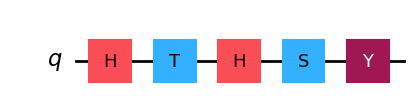

Final states: 


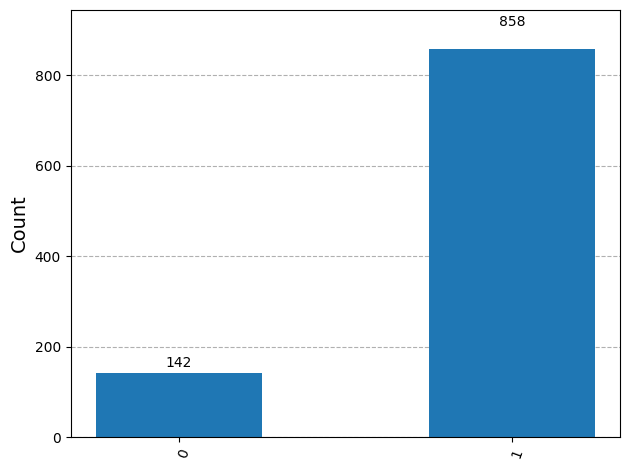

In [9]:
from qiskit import QuantumCircuit

circState = Statevector([1, 0])
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)
display(circuit.draw("mpl"))

circState = circState.evolve(circuit)

print("Final states: ")
plot_histogram(circState.sample_counts(1000))


## Tensor products

In [10]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero.tensor(one)
display(psi.draw("latex"))

<IPython.core.display.Latex object>

In [12]:
plus = Statevector.from_label("+")
minus_i = Statevector.from_label("l")
phi = plus.tensor(minus_i)
display(phi.draw("latex"))
display((plus ^ minus_i).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
H = Operator.from_label("H")
I = Operator.from_label("I")
X = Operator.from_label("X")
display(H.tensor(I).draw("latex"))
display(H.tensor(I).tensor(X).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>